# Processamento de Linguagem Natural (PLN)

## Análise de Sentimentos - Twitter

Identificar se o tweet é **racista/sexista** ou **não**

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk # pip install nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Ler dados

In [241]:
train = pd.read_csv('twitter/train.csv')
test = pd.read_csv('twitter/test.csv')

In [242]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [243]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Pré-processamento de Dados

### Tirar pontuações e caracteres especiais

In [244]:
# Expressão Regular
# r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"

In [245]:
train['tweet'] = train['tweet'].str.lower()

In [246]:
train['tweet'] = train['tweet'].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', '', x))

In [247]:
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


Ou podemos criar uma função que recebam outros dados e tenham o mesmo pré-processamento

In [248]:
def limpa_texto(data, col):
    '''
    Tira a pontuação e caracteres especiais, recebendo um dataframe (data) 
    e uma coluna (col)
    '''
    data[col] = data[col].str.lower()
    data[col] = data[col].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', '', x))

In [249]:
limpa_texto(train, 'tweet')

In [250]:
limpa_texto(test, 'tweet')

In [251]:
test.head(10)

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...
5,31968,choose to be momtips
6,31969,something inside me dies eyes ness smokeyeye...
7,31970,finishedtattooinkedinkloveit thanksaleeee
8,31971,i will never understand why my dad left me...
9,31972,delicious food lovelife capetown mannaepicur...


### Remover palavras comuns

In [252]:
def remove_palavras_comuns(data, col):
    palavras_comuns = stopwords.words('english')
    lista_de_lista_de_palavras = data['tweet'].str.split()
    for idx, _ in data.iterrows():
        data[col].at[idx] = [palavra for palavra in lista_de_lista_de_palavras[idx] \
                             if palavra not in palavras_comuns] 

In [253]:
remove_palavras_comuns(train, 'tweet')

In [254]:
remove_palavras_comuns(test, 'tweet')


In [255]:
train.head(10)

,id,label,tweet
0,1,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, u, take, u, time, ur]"
4,5,0,"[factsguide, society, motivation]"
5,6,0,"[22, huge, fan, fare, big, talking, leave, cha..."
6,7,0,"[camping, tomorrow, danny]"
7,8,0,"[next, school, year, year, exams, cant, think,..."
8,9,0,"[love, land, allin, cavs, champions, cleveland..."
9,10,0,"[welcome, im, gr8]"


In [256]:
test.head(10)

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[white, supremacists, want, everyone, see, new..."
2,31965,"[safe, ways, heal, acne, altwaystoheal, health..."
3,31966,"[hp, cursed, child, book, reservations, alread..."
4,31967,"[3rd, bihday, amazing, hilarious, nephew, eli,..."
5,31968,"[choose, momtips]"
6,31969,"[something, inside, dies, eyes, ness, smokeyey..."
7,31970,"[finishedtattooinkedinkloveit, thanksaleeee]"
8,31971,"[never, understand, dad, left, young, deep, in..."
9,31972,"[delicious, food, lovelife, capetown, mannaepi..."


### Remover variações da mesma palavra

In [257]:
def tira_variacoes_palavras(data, col):
    tira_variacao = WordNetLemmatizer()
    for idx, _ in data.iterrows():
        data[col].at[idx] = [tira_variacao.lemmatize(palavra, 'v') \
                             for palavra in data[col][idx]]


In [258]:
tira_variacoes_palavras(train, 'tweet')

In [259]:
tira_variacoes_palavras(test, 'tweet')

In [260]:
train['tweet'].tail(10)

31952                                            [go, far]
31953    [good, morning, instagram, shower, water, berl...
31954    [holiday, bull, dominate, bull, direct, whatev...
31955    [less, 2, weeks, ibizabringitonmallorcaholiday...
31956    [fish, tomorrow, carnt, wait, first, time, 2, ...
31957                                    [eat, isz, youuu]
31958    [see, nina, turner, airwaves, try, wrap, mantl...
31959    [listen, sad, songs, monday, morning, otw, wor...
31960    [sikh, temple, vandalise, calgary, wso, condem...
31961                                      [thank, follow]
Name: tweet, dtype: object

In [261]:
test['tweet'].tail(10)

17187    [love, life, createyourfuture, lifestyle, holi...
17188    [black, professor, demonize, propose, nazi, st...
17189    [learn, think, positive, positive, instagram, ...
17190    [love, pretty, happy, fresh, teenilicious, fix...
17191    [2damntuffruffmufftechnocityng005web1997ukhxin...
17192    [think, factory, leftright, polarisation, trum...
17193    [feel, like, mermaid, hairflip, neverready, fo...
17194    [hillary, campaign, today, ohioomg, amp, use, ...
17195    [happy, work, conference, right, mindset, lead...
17196    [song, glad, free, download, shoegaze, newmusi...
Name: tweet, dtype: object

### Engenharia de Recursos (Feature Engineering ) 
#### Quantidade de palavras por tweet

In [262]:
train['palavras'] = train['tweet'].apply(len)

In [263]:
test['palavras'] = test['tweet'].apply(len)

In [264]:
train

,id,label,tweet,palavras
0,1,0,"[father, dysfunctional, selfish, drag, kid, dy...",7
1,2,0,"[thank, lyft, credit, cant, use, cause, dont, ...",13
2,3,0,"[bihday, majesty]",2
3,4,0,"[model, love, u, take, u, time, ur]",7
4,5,0,"[factsguide, society, motivation]",3
...,...,...,...,...
31957,31958,0,"[eat, isz, youuu]",3
31958,31959,0,"[see, nina, turner, airwaves, try, wrap, mantl...",14
31959,31960,0,"[listen, sad, songs, monday, morning, otw, wor...",8
31960,31961,1,"[sikh, temple, vandalise, calgary, wso, condem...",7


In [265]:
test

,id,tweet,palavras
0,31963,"[studiolife, aislife, require, passion, dedica...",8
1,31964,"[white, supremacists, want, everyone, see, new...",9
2,31965,"[safe, ways, heal, acne, altwaystoheal, health...",7
3,31966,"[hp, curse, child, book, reservations, already...",10
4,31967,"[3rd, bihday, amaze, hilarious, nephew, eli, a...",11
...,...,...,...
17192,49155,"[think, factory, leftright, polarisation, trum...",11
17193,49156,"[feel, like, mermaid, hairflip, neverready, fo...",10
17194,49157,"[hillary, campaign, today, ohioomg, amp, use, ...",14
17195,49158,"[happy, work, conference, right, mindset, lead...",10


## Análise Exploratória de Dados (AED)

### Distribuição das quantidades de palavras por "label"

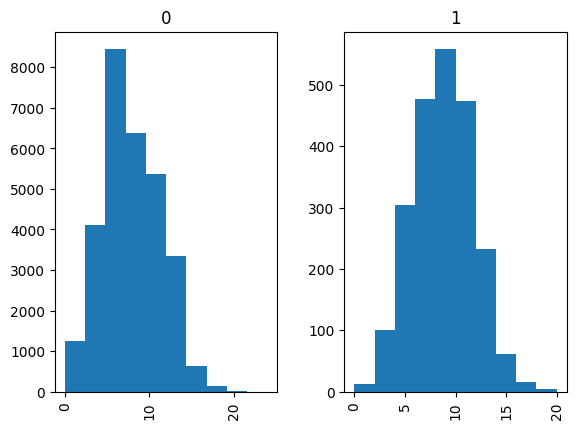

In [266]:
train.hist(column=['palavras'], by='label')
plt.show()

### Quantidade de cada "label"

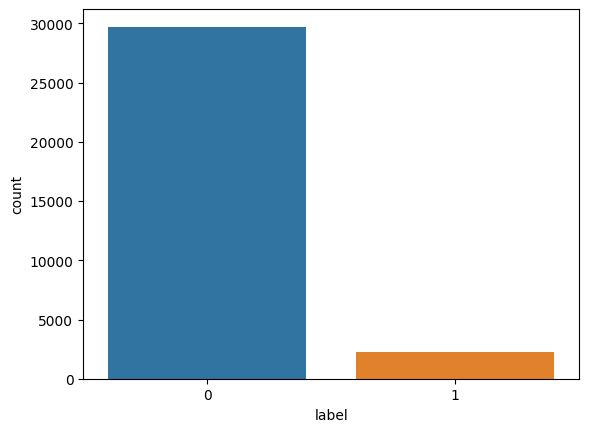

In [267]:
sns.countplot(x = 'label', data=train)
plt.show()

Quando se tem uma grande diferença de dados, o algoritmo pode acabr errando ao dizer que tudo é 0, obtendo uma acuracidade de 100% de uma forma errônea. Por isso é necessário balancear os dados, para assim obter uma melhor performance dos nossos modelos preditivos.

### Palavras frequêntes

#### Averiguar palavras mais frequêntes classificadas como "racistas ou sexistas"

In [268]:
lista_de_listas = train.loc[train['label']==1]['tweet'].values
lista_de_listas

array([list(['cnn', 'call', 'michigan', 'middle', 'school', 'build', 'wall', 'chant', 'tcot']),
       list(['comment', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins']),
       list(['retweet', 'agree']), ...,
       list(['dont', 'ball', 'hashtag', 'say', 'weasel', 'away', 'lumpy', 'tony', 'dipshit']),
       list(['make', 'ask', 'anybody', 'god', 'oh', 'thank', 'god']),
       list(['sikh', 'temple', 'vandalise', 'calgary', 'wso', 'condemn', 'act'])],
      dtype=object)

### Para problemas de lista dentro de listas, usa-se esta sintaxe para guardar tudo nem uma única lista.

In [269]:
palavras = [palavra for lista in lista_de_listas for palavra in lista]

In [270]:
len(palavras)

18596

In [271]:
import collections

In [272]:
def gera_freq_palavras(lista):
    return collections.Counter(lista)

In [273]:
freq_palavras = gera_freq_palavras(palavras)

In [274]:
len(freq_palavras)

5285

In [275]:
lista_de_palavras = []
lista_de_frequencias = []
for palavra, frequencia, in freq_palavras.items():
    lista_de_palavras.append(palavra)
    lista_de_frequencias.append(frequencia)

In [276]:
data_freq = pd.DataFrame({'palavra': lista_de_palavras, 'freq': lista_de_frequencias})

In [277]:
data_freq.sort_values('freq', ascending=False, inplace=True)

In [278]:
dict(data_freq[:10].values)

{'amp': 283,
 'trump': 216,
 'white': 153,
 'libtard': 149,
 'black': 146,
 'like': 141,
 'racist': 103,
 'politics': 97,
 'say': 96,
 'people': 95}

### Nuvem de Palavras 

In [279]:
from wordcloud import WordCloud

In [280]:
nuvem = WordCloud(background_color='white')

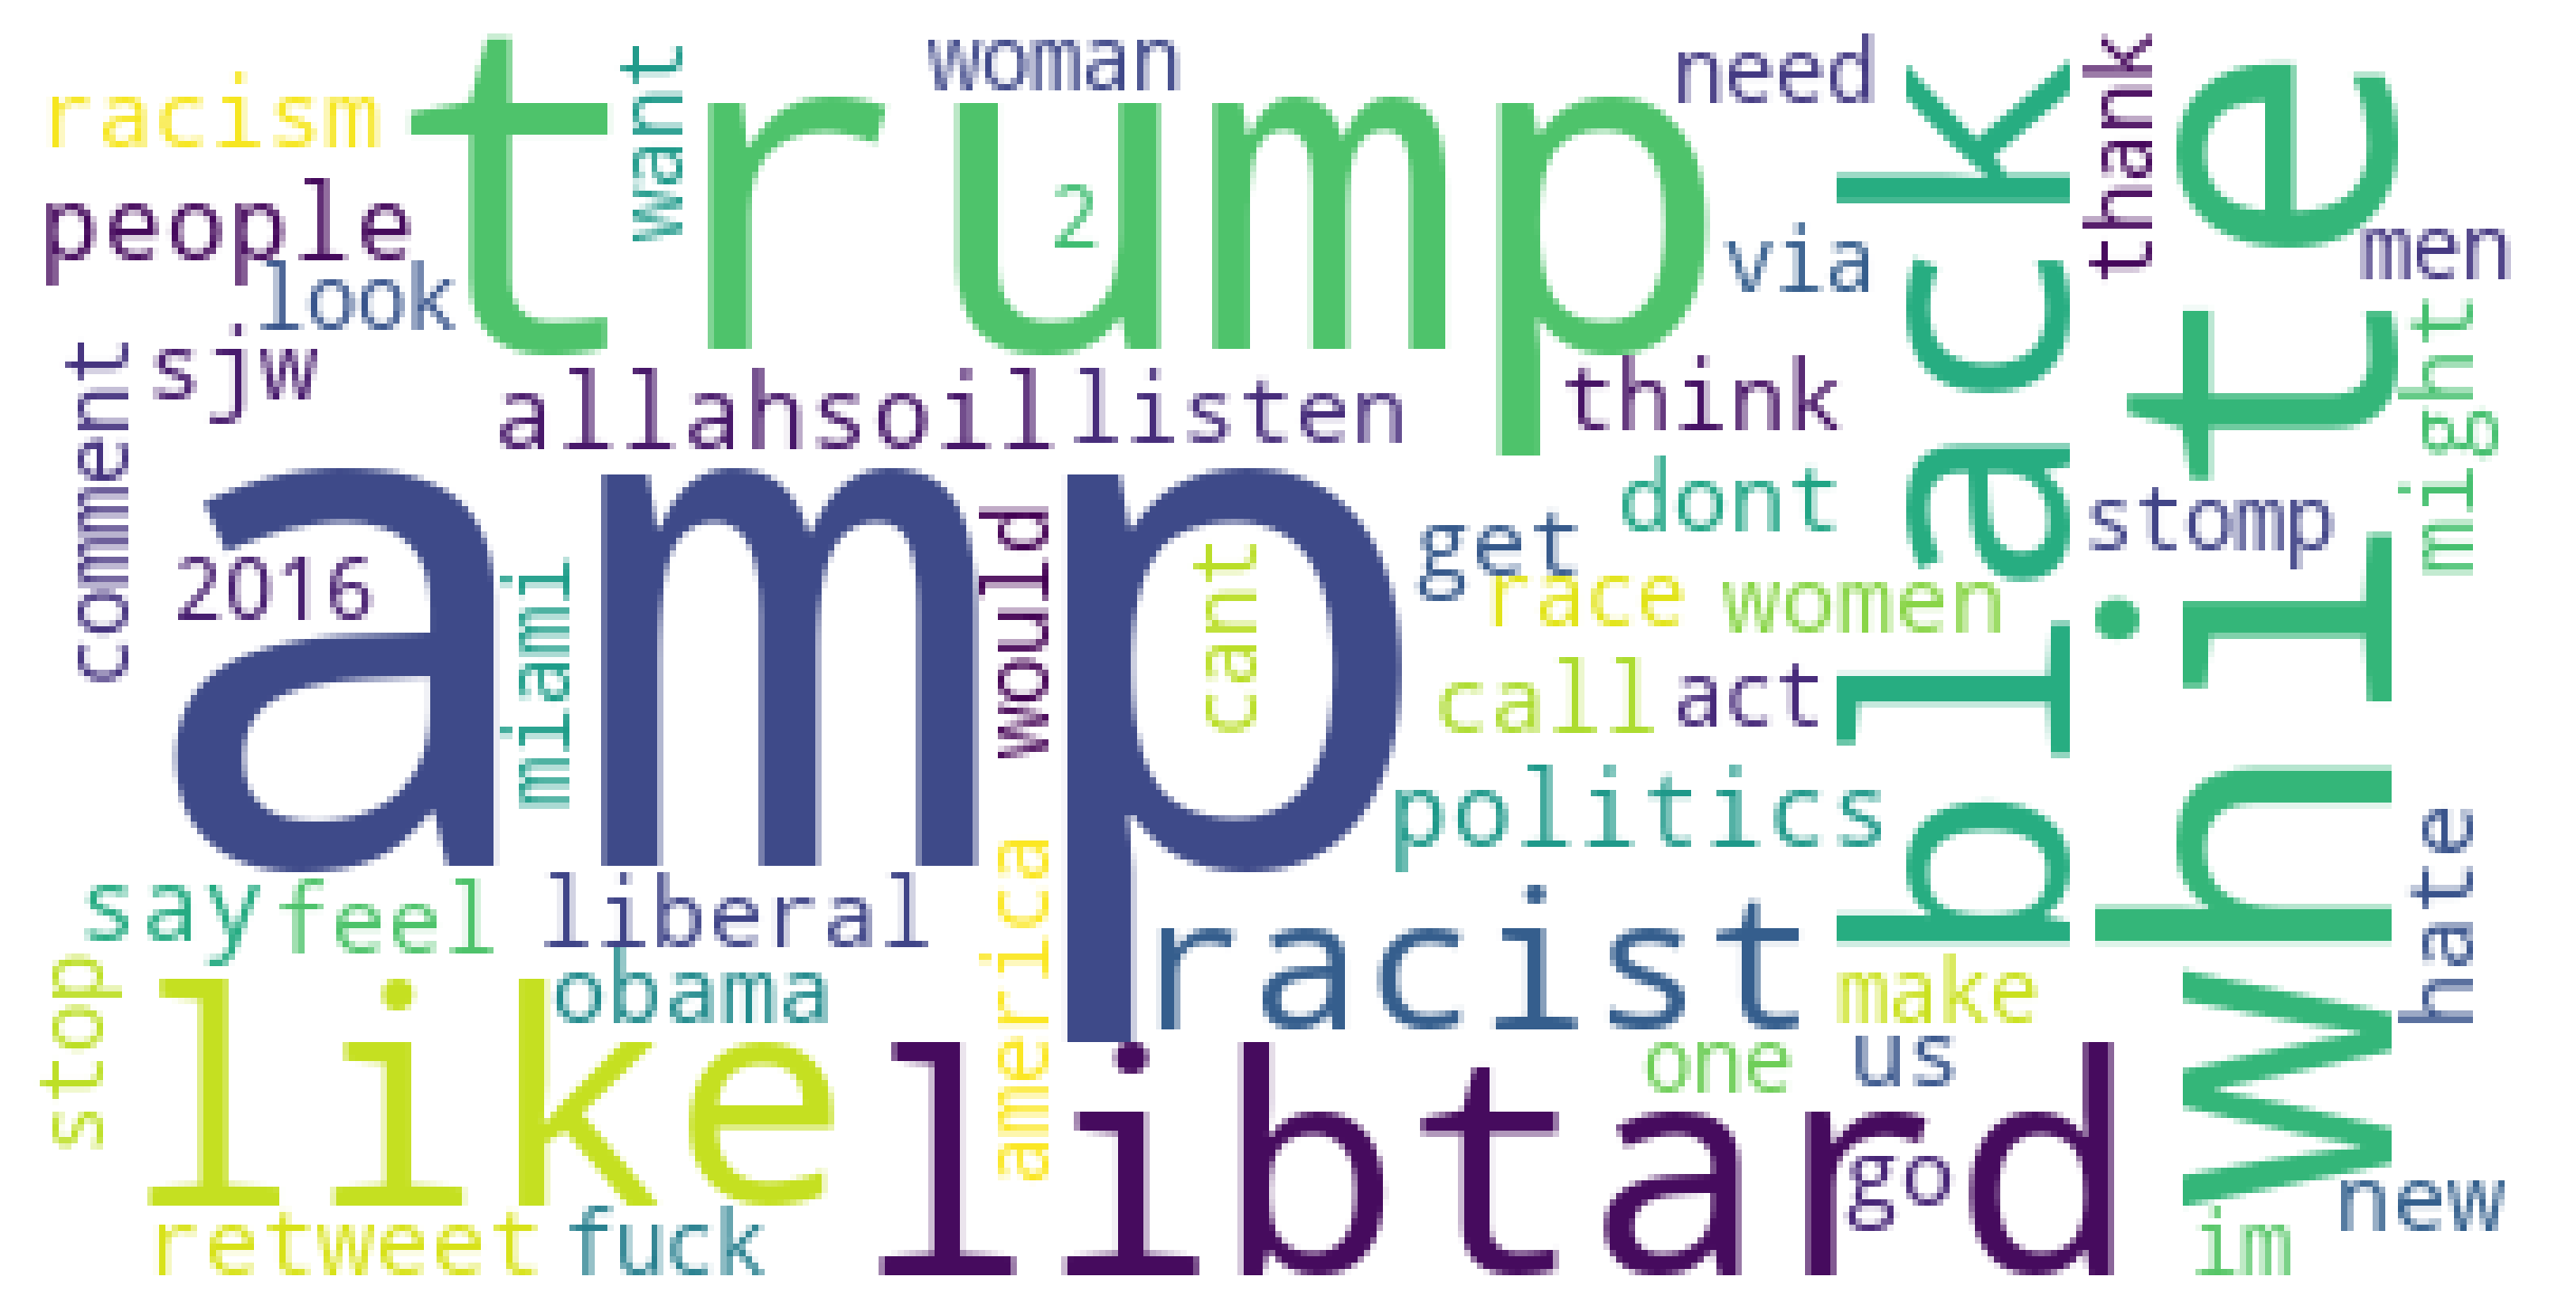

In [281]:
plt.figure(figsize=(12,8), dpi=300)
nuvem.generate_from_frequencies(dict(data_freq[:50].values))
plt.imshow(nuvem)
plt.axis('off')
plt.show()

### Retornar para formato de texto

In [282]:
train['tweet'] = train['tweet'].apply(lambda x: ' '.join(x))

In [283]:
test['tweet'] = test['tweet'].apply(lambda x: ' '.join(x))

In [284]:
test

,id,tweet,palavras
0,31963,studiolife aislife require passion dedication ...,8
1,31964,white supremacists want everyone see new bird ...,9
2,31965,safe ways heal acne altwaystoheal healthy heal,7
3,31966,hp curse child book reservations already yes h...,10
4,31967,3rd bihday amaze hilarious nephew eli ahmir un...,11
...,...,...,...
17192,49155,think factory leftright polarisation trump use...,11
17193,49156,feel like mermaid hairflip neverready formal w...,10
17194,49157,hillary campaign today ohioomg amp use word li...,14
17195,49158,happy work conference right mindset lead cultu...,10


###  Solucionar problema de desequilibrio dos dados

In [285]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [286]:
from sklearn.utils import resample

In [287]:
def equilibra_dados (train, pra_mais=True):
    train_minoria = train.loc[train['label']==1]
    train_maioria = train.loc[train['label']==0]
    if pra_mais:
        menor_pro_maior = resample(train_minoria, 
                        replace = True, 
                        n_samples=len(train_maioria), 
                        random_state=123)
        train_equilibrado = pd.concat([menor_pro_maior, train_maioria])
    else:
        maior_pro_menor = resample(train_maioria, 
                           replace = True, 
                           n_samples=len(train_minoria), 
                           random_state=123)
        train_equilibrado = pd.concat([maior_pro_menor, train_minoria])
    return train_equilibrado

In [288]:
train_equilibrado = equilibra_dados(train, pra_mais=False)

In [289]:
len(train_equilibrado)

4484

In [290]:
train_equilibrado['label'].value_counts()

0    2242
1    2242
Name: label, dtype: int64

## Treinar Modelo

In [291]:
from sklearn.model_selection import train_test_split

In [294]:
X = train_equilibrado['tweet']
y = train_equilibrado['label']

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [298]:
X_train.shape, y_train.shape

((3138,), (3138,))

In [299]:
X_test.shape, y_test.shape

((1346,), (1346,))

In [302]:
sgd = Pipeline([
    ('countVector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('modelo', SGDClassifier())
])

In [305]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('countVector', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('modelo', SGDClassifier())])

In [307]:
sgd_pred = sgd.predict(X_test)

In [308]:
sgd_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## Avaliar Performance do Modelo

In [309]:
from sklearn.metrics import f1_score

In [310]:
sgd_score = f1_score(y_test, sgd_pred)

In [311]:
sgd_score

0.8517397881996975

In [313]:
y_pred = sgd.predict(test['tweet'])
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

## Submissão

In [317]:
submissao = pd.DataFrame({'id': test['id'], 'label': y_pred})

In [318]:
submissao.head()

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0


In [319]:
submissao.to_csv('pred_twitter.csv', index=False)

Fontes (em inglês):
* http://bit.ly/NLP-Twitter
* http://bit.ly/NLP-Twitter-Competition